In [1]:
from scipy.fftpack import fft, fftshift
from scipy.special import ellipk, ellipj
import numpy as np
import sympy as sc
import matplotlib.pyplot as plt
%matplotlib inline

### 1

In [2]:
def T(phi0):
    return 4*ellipk(np.sin(phi0/2)**2)
## T = 4t(phi0)
##t(phi0) = /(l/g) K(sinphi/2) |/(l/g) = 1

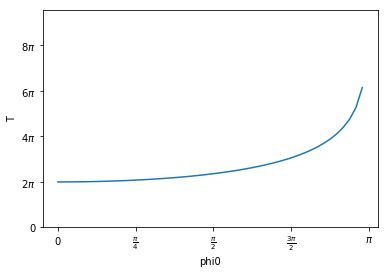

In [22]:
#Plot phi0 vs T
phis = np.linspace(0, np.pi)
ts = T(phis)
plt.figure()
plt.plot(phis, ts)
plt.ylim(0, 30)

#graph designs
plt.xticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],[r'$0$',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{2}$',r'$\pi$'])
plt.yticks(np.arange(0, 10*np.pi, step=2*np.pi),['0',r'$2\pi$', r'$4\pi$', r'$6\pi$',r'$8\pi$'])
plt.xlabel("phi0")
plt.ylabel("T")
plt.show()

### 2

In [4]:
def sinepsi(t, phi0):
    return ellipj(t, np.sin(phi0/2)**2)[0]

In [5]:
def psi(t, phi0):
    return ellipj(t, np.sin(phi0/2)**2)[3] 

In [6]:
def phinorm(x, phi0):
    return 2*np.arcsin(np.sin(phi0/2) * sinepsi(x*T(phi0), phi0))/phi0

In [7]:
phi0x = [np.pi/10, 4*np.pi/5, 19*np.pi/20, 0.99*np.pi, 0.999*np.pi]

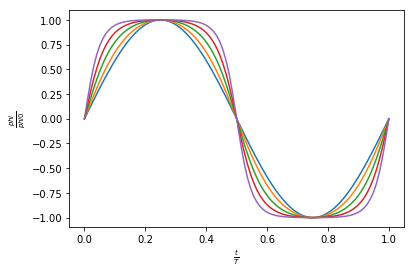

In [8]:
x= np.linspace(0,1,100)
#flist = [lambda x: phinorm(x, phi0[i]) for i in range(5)]
flist = [phinorm(x, phi0) for phi0 in phi0x]
phinorm(x,phi0x[0])
for i in range(5):
    #plt.plot(x,phinorm(x, phi0[i]))
    plt.plot(x,flist[i])
plt.xlabel(r'$\frac{t}{T}$')
plt.ylabel(r'$\frac{phi}{phi0}$')

In [9]:
#phinorm(x,phi0x[0])*phi0x[0]

### 3

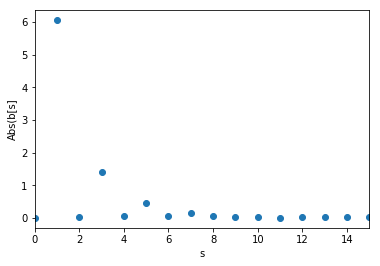

In [10]:
foulist = np.abs(fft(flist[4]))/np.sqrt(len(flist[4]))
plt.plot(foulist,'o')
plt.xlim(0,15)
plt.xlabel('s')
plt.ylabel('Abs(b[s]')

In [11]:
#m = sc.Symbol(“m”)
#f = 1/sc.sqrt(1 – m*sc.sin(psi**2))
#f.series(x, point=0, n=10)
#.subs({m: Sin[phi0/2]^2})

### 4

\begin{align}
E &= \frac{m}{2}l^2\dot{\varphi}^2 - mglcos\varphi\\
\frac{2}{ml^2}E+mglcos\varphi &= \dot{\varphi}^2\\
\sqrt{\frac{g}{g}(\frac{2E}{ml^2} + \frac{mglcos\varphi}{ml^2})} &= \dot{\varphi}\\
\\
*\frac{g}{l} = 1\\
\\
\sqrt{2(\frac{E}{mgl} + lcos\varphi)} &= \dot{\varphi}\\
\end{align}

C:\Users\Andrea Rica\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


([<matplotlib.axis.XTick at 0x1a3b13ffba8>,
 <a list of 5 Text xticklabel objects>)

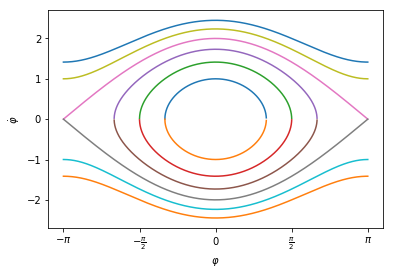

In [24]:
#l = 1
def phidot (phi,E):
    fxn = 2*(E+(np.cos(phi)))
    return (np.sqrt((fxn)))
phi = np.linspace(-np.pi,np.pi,10000)
Emgl = [-0.5,0,0.5,1,1.5,2]
phiplot = [phidot(phi, E) for E in Emgl]
#)
for i in range(6):
    #plt.plot(x,phinorm(x, phi0[i]))
    plt.plot(phi,phiplot[i])
    plt.plot(phi,-phiplot[i])
#plt.figure()
#X,Y = np.meshgrid(phi, phiplot[0])
#Z = Emgl[0](Y,X)
#plt.contour(X,Y,Z)
plt.ylabel(r'$\dot{\varphi}$')
plt.xlabel(r'$\varphi$')
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],[r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$',r'$\frac{\pi}{2}$', r'$\pi$'])

In [ ]:
#l = 1
def phidot (phi,E):
    fxn = 2*(E+(np.cos(phi)))
    return (np.sqrt((fxn)))
phi = np.linspace(-np.pi,np.pi,1000)
Emgl = [-0.5,0,0.5,1,1.5,2]
phiplot = [phidot(phi, E) for E in Emgl]
def En (phi,phidot):
    fxn = (phidot**2)/2 - (np.cos(phi))
    return fxn
Energy = [En(phi, phid) for phid in phiplot]
for i in range(6):
    #plt.plot(x,phinorm(x, phi0[i]))
    #plt.plot(phi,phiplot[i])
    #plt.plot(phi,-phiplot[i])
    Energy = [En(phi, phid) for phid in phiplot]
#plt.figure()
X,Y = np.meshgrid(phi, phiplot[0])
Z = Energy
plt.contour(X,Y,Z)
plt.ylabel(r'$\dot{\varphi}$')
plt.xlabel(r'$\varphi$')

In [ ]:
#l = 1
def En (phi,phidot):
    fxn = (phidot**2)/2 - (np.cos(phi))
    return (np.sqrt(np.abs(fxn)))
phi = np.linspace(-np.pi,np.pi,1000)
Emgl = [-0.5,0,0.5,1,1.5,2]
phiplot = [phidot(phi, E) for E in Emgl]
def En
#)
#for i in range(6):
    #plt.plot(x,phinorm(x, phi0[i]))
    #plt.plot(phi,phiplot[i])
    #plt.plot(phi,-phiplot[i])
plt.figure()
X,Y = np.meshgrid(phi, phiplot[0])
Z = Emgl[0]**2
plt.ylabel(r'$\dot{\varphi}$')
plt.xlabel(r'$\varphi$')

In [ ]:
Z